In [1]:
import numpy as np
import pandas as pd

pd.set_option('max_columns', 100)

In [2]:
from overSampling import duplicateMinority

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

### Reading .csv file

In [4]:
raw = pd.read_csv('training_cleaned.csv')
raw.head()

,loss_216.208,loss_436.087,fragment_219.17,loss_14.896,loss_1026.581,loss_311.293,loss_381.095,loss_1175.592,loss_329.184,fragment_986.602,loss_781.47,loss_180.105,fragment_335.721,fragment_180.067,loss_1058.402,fragment_449.171,loss_1615.773,loss_178.194,loss_130.91,fragment_236.103,loss_906.289,loss_47.879,fragment_1568.772,fragment_396.736,fragment_1000.449,loss_1540.675,loss_504.128,loss_347.671,fragment_349.187,loss_455.133,fragment_756.149,loss_1351.715,fragment_363.049,loss_602.447,loss_318.19,loss_49.758,loss_191.186,loss_1274.632,loss_332.144,loss_77.043,loss_1085.602,fragment_1712.778,loss_538.231,loss_1194.518,fragment_594.439,loss_818.23,loss_587.124,loss_1029.526,loss_744.445,loss_1021.311,...,fragment_756.853,fragment_119.021,fragment_435.128,loss_467.274,fragment_1821.827,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid,MQScore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.493507
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.491853
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.697186
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0.361187
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0.449019


In [5]:
raw.shape

(851, 23448)

### Extracting features, labels, and confidence score

In [6]:
feature = raw.iloc[:,2:23403]

In [7]:
label = raw.iloc[:,23403:-1]

In [8]:
confidence = raw.iloc[:,-1]

### Distribution of labels

In [9]:
n_ones = label.sum()
n_records = label.shape[0]
n_labels = label.shape[1]

In [10]:
for i in range(n_labels):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones.index[i], int(n_ones[i]), n_records))

X2_MethylbutanoicAcid                88 / 851
AcacicAcid                            9 / 851
Acetylglucosamine                     7 / 851
Alanine                              15 / 851
AminoAcid                            15 / 851
Anthocyanidin                         3 / 851
CaffeicAcid                          24 / 851
pCoumaricAcid                       107 / 851
CinnamicAcid                         68 / 851
Cyclic_Monoterpene                    5 / 851
Deoxyfuranose                        75 / 851
DihydroFlavone                       84 / 851
Dihydroflavonol                      69 / 851
DiHydroxyPiperidineCarboxylicAcid     2 / 851
Echinocystic_LactoneBridge            2 / 851
OleanolicAcid                        53 / 851
Flavan3ol                           419 / 851
Flavonol                            202 / 851
Flavone                              21 / 851
Furanose                             75 / 851
GallicAcid                          327 / 851
Glucosamine                       

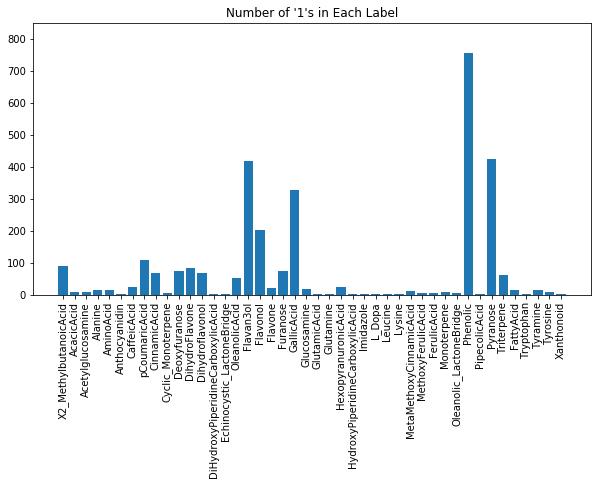

In [11]:
plt.bar(np.arange(n_labels),n_ones)
plt.xticks(np.arange(n_labels), n_ones.index, rotation='vertical')
plt.ylim([0,n_records])
plt.title('Number of \'1\'s in Each Label')
plt.show()

### Duplicating Minorities

Duplicate compounds which have minority labels positive until there are not as many minority labels as before.

In [12]:
newraw = duplicateMinority(raw, 23403, -1, 100)

Round: 1; Max/Min: 756.0
[809, 72, 355, 809, 704, 38]
Round: 2; Max/Min: 378.5
[3, 149, 72, 3, 355, 704, 3, 38, 570]
Round: 3; Max/Min: 254.0
[357, 149, 809, 72, 355, 809, 704, 38, 570]
Round: 4; Max/Min: 191.25
[357, 149, 72, 355, 704, 38, 570]
Round: 5; Max/Min: 153.6
[357, 55, 3, 149, 809, 72, 3, 355, 809, 704, 202, 3, 38, 570]
Round: 6; Max/Min: 129.16666666666666
[357, 55, 149, 72, 355, 704, 202, 38, 570]
Round: 7; Max/Min: 111.28571428571429
[357, 55, 149, 809, 72, 355, 809, 704, 202, 38, 570]
Round: 8; Max/Min: 97.875
[357, 55, 3, 149, 72, 3, 355, 704, 202, 3, 38, 570]
Round: 9; Max/Min: 87.77777777777777
[357, 55, 149, 809, 72, 355, 809, 704, 202, 38, 570]
Round: 10; Max/Min: 79.4
[357, 55, 149, 72, 355, 704, 202, 38, 570]
Round: 11; Max/Min: 72.54545454545455
[357, 55, 3, 149, 809, 72, 3, 355, 809, 704, 202, 3, 38, 570]
Round: 12; Max/Min: 67.08333333333333
[357, 55, 149, 72, 355, 704, 202, 38, 570]
Round: 13; Max/Min: 62.23076923076923
[357, 55, 149, 809, 72, 355, 809, 704, 2

In [13]:
newraw.shape

(4481, 23448)

### Extracting features, labels, and confidence score

In [14]:
newfeature = newraw.iloc[:,2:23403]

In [15]:
newlabel = newraw.iloc[:,23403:-1]

In [16]:
newconfidence = newraw.iloc[:,-1]

### Distribution of labels

In [17]:
n_ones = newlabel.sum()
n_records = newlabel.shape[0]
n_labels = newlabel.shape[1]

In [18]:
for i in range(n_labels):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones.index[i], int(n_ones[i]), n_records))

X2_MethylbutanoicAcid               1342 / 4481
AcacicAcid                          282 / 4481
Acetylglucosamine                   280 / 4481
Alanine                             1658 / 4481
AminoAcid                           1658 / 4481
Anthocyanidin                       275 / 4481
CaffeicAcid                         567 / 4481
pCoumaricAcid                       275 / 4481
CinnamicAcid                        342 / 4481
Cyclic_Monoterpene                  275 / 4481
Deoxyfuranose                       275 / 4481
DihydroFlavone                      545 / 4481
Dihydroflavonol                     276 / 4481
DiHydroxyPiperidineCarboxylicAcid   275 / 4481
Echinocystic_LactoneBridge          275 / 4481
OleanolicAcid                       1034 / 4481
Flavan3ol                           626 / 4481
Flavonol                            409 / 4481
Flavone                             275 / 4481
Furanose                            275 / 4481
GallicAcid                          334 / 4481
Glucosami

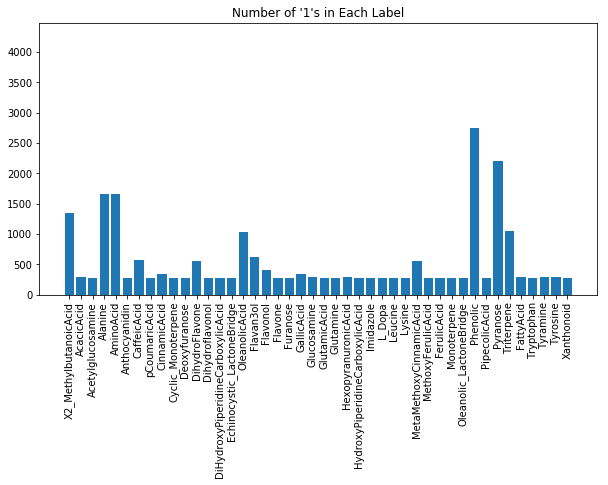

In [19]:
plt.bar(np.arange(n_labels),n_ones)
plt.xticks(np.arange(n_labels), n_ones.index, rotation='vertical')
plt.ylim([0,n_records])
plt.title('Number of \'1\'s in Each Label')
plt.show()

### Write Data to CSV File

In [20]:
newraw.to_csv('training_duplicated2.csv', index=None)